In [1]:
pip install pysal

  Obtaining dependency information for spaghetti>=1.7.2 from https://files.pythonhosted.org/packages/11/4d/caba72dcd36aa0360a64b46c8977df92c0263c63aa34bfe0ac61d659b7be/spaghetti-1.7.5.post1-py3-none-any.whl.metadata
  Obtaining dependency information for momepy>=0.5.4 from https://files.pythonhosted.org/packages/85/e0/2a416fa763528fc053745075ef35cfa62297535f7f6034f0ba4f6e116e94/momepy-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for tobler>=0.8.2 from https://files.pythonhosted.org/packages/40/8a/40758c311e488597c09fc3265cbbfb11736db1eec46c1972c1401b75402e/tobler-0.11.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/277.8 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/277.8 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  276.5/277.8 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 277.8/277.8 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/54.1 kB ? eta -:-

In [17]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal
import geopandas as gpd

from shapely.geometry import Point

sns.set(style="whitegrid")

In [18]:
safegraph_july = pd.read_csv("R:\s24_uep238\iopiyo01\in\in\July_2021.csv")
boston_property = pd.read_csv("R:\s24_uep238\iopiyo01\in\in\HomeHarvest.csv").dropna(subset=["latitude", "longitude"])
ma_tracts = gpd.read_file(r"R:\s24_uep238\iopiyo01\in\in\tl_2021_25_tract\tl_2021_25_tract.shp")

In [5]:
boston_property

,property_url,mls,mls_id,status,text,style,street,unit,city,state,...,fips_code,stories,hoa_fee,parking_garage,agent,broker,broker_phone,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,BSMA,72823508.0,SOLD,BEST AND FINAL DUE MAY 3RD BY 6:00PM. Located ...,CONDOS,533 E 5th St,Unit 1,Boston,MA,...,25025.0,NaN,150.0,NaN,NaN,NaN,NaN,Boston Green Academy Horace Mann Charter Schoo...,http://ap.rdcpix.com/bece8a692df1e2483f70f072d...,http://ap.rdcpix.com/bece8a692df1e2483f70f072d...
1,https://www.realtor.com/realestateandhomes-det...,BSMA,72842222.0,SOLD,SUN 6/7 OH CANCELLED - OFFER ACCEPTED. Enjoy e...,CONDOS,292 Bunker Hill St,Apt 2,Boston,MA,...,25025.0,NaN,208.0,NaN,NaN,NaN,NaN,"Prospect Hill Academy Charter (District), Comm...",http://ap.rdcpix.com/298dcec6b690306b977b71537...,http://ap.rdcpix.com/298dcec6b690306b977b71537...
2,https://www.realtor.com/realestateandhomes-det...,BSMA,72825223.0,SOLD,The Options are Endless in this Premier Eastsi...,CONDOS,536 E 4th St,Unit 1,Boston,MA,...,25025.0,NaN,250.0,NaN,NaN,NaN,NaN,Boston Green Academy Horace Mann Charter Schoo...,http://ap.rdcpix.com/e7433148361ab4406e212ecca...,http://ap.rdcpix.com/e7433148361ab4406e212ecca...
3,https://www.realtor.com/realestateandhomes-det...,BSMA,72717466.0,SOLD,"A condo unit with 2 BEDS, 1 1/2 BATH and 1 ass...",CONDOS,15 North Beacon St,Apt 425,Boston,MA,...,25025.0,NaN,636.0,1.0,NaN,NaN,NaN,"Match Charter Public School (District), Boston...",http://ap.rdcpix.com/c5b2a5e04a50245df6ece55d2...,http://ap.rdcpix.com/c5b2a5e04a50245df6ece55d2...
4,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,SOLD,NaN,CONDO,511 Massachusetts Ave,# 5,Boston,MA,...,25025.0,1.0,NaN,NaN,NaN,NaN,NaN,Edward M. Kennedy Academy For Health Careers (...,http://ap.rdcpix.com/2121369102/60df3f5a1d6643...,http://ap.rdcpix.com/2121369102/60df3f5a1d6643...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,https://www.realtor.com/realestateandhomes-det...,BSMA,72763595.0,SOLD,Now Introducing this remarkable total renovati...,CONDOS,239 Lexington St,Unit 1,Boston,MA,...,25025.0,NaN,238.0,NaN,NaN,NaN,NaN,"Excel Academy Charter (District), Boston Schoo...",http://ap.rdcpix.com/95211e64b9821befd75325e3a...,http://ap.rdcpix.com/95211e64b9821befd75325e3a...
958,https://www.realtor.com/realestateandhomes-det...,BSMA,72851931.0,SOLD,New Construction Alert! Model units now open. ...,CONDOS,50 Hichborn St,Apt 204,Boston,MA,...,25025.0,NaN,351.0,1.0,NaN,NaN,NaN,Boston School District,http://ap.rdcpix.com/680edd41062c6e80deb00353d...,http://ap.rdcpix.com/680edd41062c6e80deb00353d...
959,https://www.realtor.com/realestateandhomes-det...,BSMA,72852550.0,SOLD,"Welcome to 49 Eutaw street, one of East Boston...",CONDOS,49 Eutaw St,Apt 1,Boston,MA,...,25025.0,NaN,1.0,NaN,NaN,NaN,NaN,"Excel Academy Charter (District), Boston Schoo...",NaN,NaN
960,https://www.realtor.com/realestateandhomes-det...,BSMA,72818497.0,SOLD,Great opportunity arrives at Clarendon Hills a...,CONDOS,101 Victoria Heights Rd,Unit 101,Boston,MA,...,25025.0,NaN,256.0,NaN,NaN,NaN,NaN,"Brooke Charter Schools, Boston School District",http://ap.rdcpix.com/75f30cd5b56b4ff6051211a67...,http://ap.rdcpix.com/75f30cd5b56b4ff6051211a67...


In [6]:
# Drop the 'visits_by_each_hour' column
boston_property.drop('price_per_sqft', axis=1, inplace=True)

In [23]:
import numpy as np
import ast

# Define a function to sum visits from 6am to 4pm
def sum_day_visits(visits):
    visits = ast.literal_eval(visits)  # Convert string representation of list to list
    visits = np.array(visits, dtype=int)  # Convert list to array of integers
    day_visits = np.sum(visits[6:16])  # Sum visits from 6am to 4pm
    return day_visits

# Apply the function to create the new column 'day_visits'
safegraph_july['day_visits'] = safegraph_july['visits_by_each_hour'].apply(sum_day_visits)


In [24]:
# Define a function to sum visits from 4pm to 6am
def sum_night_visits(visits):
    visits = ast.literal_eval(visits)  # Convert string representation of list to list
    visits = np.array(visits, dtype=int)  # Convert list to array of integers
    night_visits = np.sum(visits[16:])  # Sum visits from 4pm to 6am
    night_visits += np.sum(visits[:6])  # Sum visits from midnight to 6am
    return night_visits

# Apply the function to create the new column 'night_visits'
safegraph_july['night_visits'] = safegraph_july['visits_by_each_hour'].apply(sum_night_visits)

In [25]:

# Define a function to sum visits from 4pm to 6am
def sum_weekend_visits(visits):
    visits = ast.literal_eval(visits)  # Convert string representation of list to list
    visits = np.array(visits, dtype=int)  # Convert list to array of integers
    weekend_visits = np.sum(visits[7:])  # Sum visits for Sunday
    weekend_visits += np.sum(visits[:1])  # Sum visits for Saturday
    return weekend_visits

# Apply the function to create the new column 'night_visits'
safegraph_july['weekend_visits'] = safegraph_july['visits_by_each_hour'].apply(sum_weekend_visits)

In [26]:
safegraph_july["visits_by_each_hour"]

0        [0,0,0,0,0,0,2,1,1,0,0,0,1,1,1,0,0,2,0,1,0,0,0...
1        [0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,1,1,1,0,0,0,0,0...
2        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
3        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
4        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
                               ...                        
43531    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
43532    [0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,7,2,2,6,0,0...
43533    [0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,3,4,2,0,5,14,1,...
43534    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,2,0,0...
43535    [0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,1,1,0,1,2,1,0...
Name: visits_by_each_hour, Length: 43536, dtype: object

In [27]:
list(boston_property)

['property_url',
 'mls',
 'mls_id',
 'status',
 'text',
 'style',
 'street',
 'unit',
 'city',
 'state',
 'zip_code',
 'beds',
 'full_baths',
 'half_baths',
 'sqft',
 'year_built',
 'days_on_mls',
 'list_price',
 'list_date',
 'sold_price',
 'last_sold_date',
 'lot_sqft',
 'price_per_sqft',
 'latitude',
 'longitude',
 'neighborhoods',
 'county',
 'fips_code',
 'stories',
 'hoa_fee',
 'parking_garage',
 'agent',
 'broker',
 'broker_phone',
 'nearby_schools',
 'primary_photo',
 'alt_photos']

In [28]:
boston_property[:20]

,property_url,mls,mls_id,status,text,style,street,unit,city,state,...,fips_code,stories,hoa_fee,parking_garage,agent,broker,broker_phone,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,BSMA,72823508.0,SOLD,BEST AND FINAL DUE MAY 3RD BY 6:00PM. Located ...,CONDOS,533 E 5th St,Unit 1,Boston,MA,...,25025.0,NaN,150.0,NaN,NaN,NaN,NaN,Boston Green Academy Horace Mann Charter Schoo...,http://ap.rdcpix.com/bece8a692df1e2483f70f072d...,http://ap.rdcpix.com/bece8a692df1e2483f70f072d...
1,https://www.realtor.com/realestateandhomes-det...,BSMA,72842222.0,SOLD,SUN 6/7 OH CANCELLED - OFFER ACCEPTED. Enjoy e...,CONDOS,292 Bunker Hill St,Apt 2,Boston,MA,...,25025.0,NaN,208.0,NaN,NaN,NaN,NaN,"Prospect Hill Academy Charter (District), Comm...",http://ap.rdcpix.com/298dcec6b690306b977b71537...,http://ap.rdcpix.com/298dcec6b690306b977b71537...
2,https://www.realtor.com/realestateandhomes-det...,BSMA,72825223.0,SOLD,The Options are Endless in this Premier Eastsi...,CONDOS,536 E 4th St,Unit 1,Boston,MA,...,25025.0,NaN,250.0,NaN,NaN,NaN,NaN,Boston Green Academy Horace Mann Charter Schoo...,http://ap.rdcpix.com/e7433148361ab4406e212ecca...,http://ap.rdcpix.com/e7433148361ab4406e212ecca...
3,https://www.realtor.com/realestateandhomes-det...,BSMA,72717466.0,SOLD,"A condo unit with 2 BEDS, 1 1/2 BATH and 1 ass...",CONDOS,15 North Beacon St,Apt 425,Boston,MA,...,25025.0,NaN,636.0,1.0,NaN,NaN,NaN,"Match Charter Public School (District), Boston...",http://ap.rdcpix.com/c5b2a5e04a50245df6ece55d2...,http://ap.rdcpix.com/c5b2a5e04a50245df6ece55d2...
4,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,SOLD,NaN,CONDO,511 Massachusetts Ave,# 5,Boston,MA,...,25025.0,1.0,NaN,NaN,NaN,NaN,NaN,Edward M. Kennedy Academy For Health Careers (...,http://ap.rdcpix.com/2121369102/60df3f5a1d6643...,http://ap.rdcpix.com/2121369102/60df3f5a1d6643...
5,https://www.realtor.com/realestateandhomes-det...,BSMA,72814212.0,SOLD,Spacious two family with three levels of livin...,MULTI_FAMILY,18-20 Presentation Rd,NaN,Boston,MA,...,25025.0,3.0,NaN,2.0,NaN,NaN,NaN,Boston School District,http://ap.rdcpix.com/67b9ae8a98f34f16d36611a5e...,http://ap.rdcpix.com/67b9ae8a98f34f16d36611a5e...
6,https://www.realtor.com/realestateandhomes-det...,BSMA,72781268.0,SOLD,Tastefully updated historic brownstone on reno...,SINGLE_FAMILY,295 K St,NaN,Boston,MA,...,25025.0,2.0,NaN,NaN,NaN,NaN,NaN,Boston Green Academy Horace Mann Charter Schoo...,http://ap.rdcpix.com/66e98e11ff73700ae7947ce59...,http://ap.rdcpix.com/66e98e11ff73700ae7947ce59...
7,https://www.realtor.com/realestateandhomes-det...,BSMA,72807846.0,SOLD,Check out the virtual tour attached to this li...,CONDOS,78 Gainsborough St,Unit 005E,Boston,MA,...,25025.0,NaN,456.0,NaN,NaN,NaN,NaN,Edward M. Kennedy Academy For Health Careers (...,http://ap.rdcpix.com/5e1d08caa25d7408935c35d77...,http://ap.rdcpix.com/5e1d08caa25d7408935c35d77...
8,https://www.realtor.com/realestateandhomes-det...,BSMA,72826493.0,SOLD,Prime Location. Welcome to this fabulous brick...,SINGLE_FAMILY,57 Sunset Hill Rd,NaN,Boston,MA,...,25025.0,NaN,NaN,1.0,NaN,NaN,NaN,"Brooke Charter Schools, Boston School District",http://ap.rdcpix.com/2d6a25328d113ee4199fe33bb...,http://ap.rdcpix.com/2d6a25328d113ee4199fe33bb...
9,https://www.realtor.com/realestateandhomes-det...,BSMA,72820152.0,SOLD,Wonderful Opportunity in Boston's St Botolph N...,MULTI_FAMILY,119 Saint Botolph St,NaN,Boston,MA,...,25025.0,5.0,NaN,NaN,NaN,NaN,NaN,Boston School District,http://ap.rdcpix.com/a7540106dc87450b2cada1b19...,http://ap.rdcpix.com/a7540106dc87450b2cada1b19...


In [29]:

irrelevant_columns = ['property_url', 'mls', 'mls_id','zip_code','fips_code', 'text', 'primary_photo', 'alt_photos', 
                     'nearby_schools']
boston_property = boston_property.drop(columns=irrelevant_columns)

In [30]:

# Drop columns with at least 50 NaN values
boston_property = boston_property.dropna(thresh=len(boston_property) - 50, axis=1)
# Drop rows with NaN values
boston_property = boston_property.dropna()
# Drop irrelevant columns


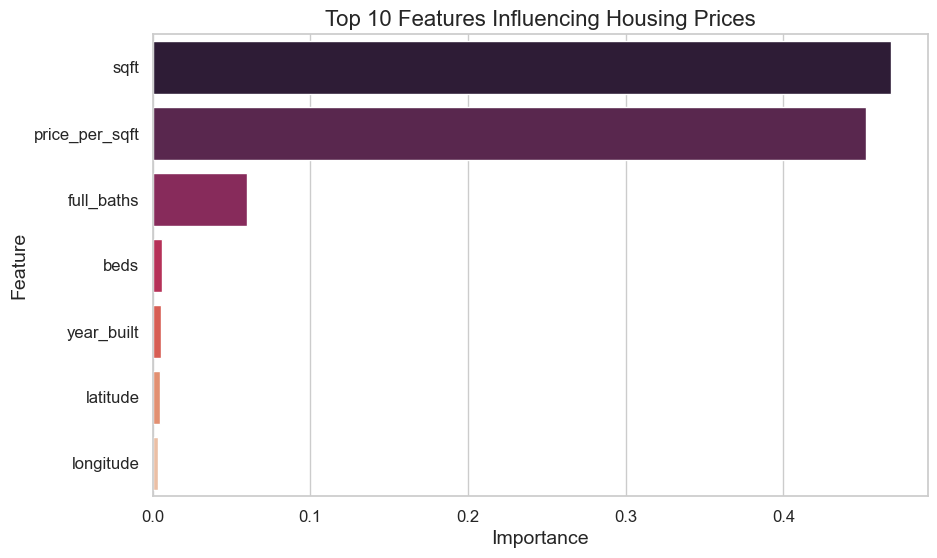

Top 10 features influencing housing prices:
['sqft', 'price_per_sqft', 'full_baths', 'beds', 'year_built', 'latitude', 'longitude']


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming your data is stored in a DataFrame called df
target = 'sold_price'

# Selecting only numeric features
numeric_features = boston_property.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove(target)

# Dropping target column to create X
X = boston_property[numeric_features]
y = boston_property[target]

# Using Random Forest to get feature importance
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
feature_importance = model.feature_importances_

# Creating a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': numeric_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
plt.title('Top 10 Features Influencing Housing Prices', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Top 10 features
top_10_features = feature_importance_df['Feature'].head(10).tolist()
print("Top 10 features influencing housing prices:")
print(top_10_features)



In [32]:
import geopandas as gpd

# Convert safegraph DataFrame to a GeoDataFrame
boston_gdf = gpd.GeoDataFrame(safegraph_july, 
                               geometry=gpd.points_from_xy(safegraph_july.longitude, safegraph_july.latitude),
                               crs='EPSG:4269')

# Perform spatial join
boston_with_tracts = gpd.sjoin(boston_gdf, ma_tracts, how="left", op='within')

# Check if the spatial join was successful
print(boston_with_tracts.columns)


C:\JumboConda\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Index(['placekey', 'naics_code', 'latitude', 'longitude', 'brands',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'visits_by_each_hour', 'poi_cbg',
       'visitor_home_cbgs', 'distance_from_home', 'bucketed_dwell_times',
       'day_visits', 'night_visits', 'weekend_visits', 'geometry',
       'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON'],
      dtype='object')


In [20]:
ma_tracts.columns.values

array(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'], dtype=object)

In [25]:
boston_with_tracts[:50]

,placekey,naics_code,latitude,longitude,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,...,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,zzw-222@62j-pdy-hnq,712190.0,42.709047,-70.774151,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,49,42,"[10,6,9,8,3,3,10]",...,223100,25009223100,2231,Census Tract 2231,G5020,S,44821814.0,15633567.0,+42.7059618,-070.8132771
1,zzw-222@62j-pdy-hnq,712190.0,42.709047,-70.774151,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,42,40,"[7,9,4,1,1,5,15]",...,223100,25009223100,2231,Census Tract 2231,G5020,S,44821814.0,15633567.0,+42.7059618,-070.8132771
2,zzw-222@62j-pf4-2rk,441222.0,42.702864,-70.817292,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,1,1,"[0,0,0,1,0,0,0]",...,223100,25009223100,2231,Census Tract 2231,G5020,S,44821814.0,15633567.0,+42.7059618,-070.8132771
3,zzw-222@62j-pfj-2p9,453110.0,42.646418,-70.805689,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,1,1,"[0,0,0,0,0,1,0]",...,222100,25009222100,2221,Census Tract 2221,G5020,S,36161205.0,5384307.0,+42.6404513,-070.7711646
4,zzw-222@62j-pfj-2p9,453110.0,42.646418,-70.805689,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,1,1,"[0,0,0,0,1,0,0]",...,222100,25009222100,2221,Census Tract 2221,G5020,S,36161205.0,5384307.0,+42.6404513,-070.7711646
5,zzw-222@62j-pfj-gtv,713910.0,42.649336,-70.779383,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,40,16,"[10,3,8,5,1,6,7]",...,222100,25009222100,2221,Census Tract 2221,G5020,S,36161205.0,5384307.0,+42.6404513,-070.7711646
6,zzw-222@62j-pfj-gtv,713910.0,42.649336,-70.779383,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,37,15,"[4,5,8,5,3,11,1]",...,222100,25009222100,2221,Census Tract 2221,G5020,S,36161205.0,5384307.0,+42.6404513,-070.7711646
7,zzw-222@62j-pfs-3h5,712190.0,42.738129,-70.866233,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,1,1,"[0,0,0,0,0,1,0]",...,270100,25009270100,2701,Census Tract 2701,G5020,S,47139582.0,5571536.0,+42.7214946,-070.8866372
8,zzw-222@62j-pfs-3h5,712190.0,42.738129,-70.866233,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,1,1,"[0,0,0,0,0,0,1]",...,270100,25009270100,2701,Census Tract 2701,G5020,S,47139582.0,5571536.0,+42.7214946,-070.8866372
9,zzw-222@62j-pfv-389,811411.0,42.720666,-70.859534,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,8,5,"[3,0,0,1,0,1,3]",...,270100,25009270100,2701,Census Tract 2701,G5020,S,47139582.0,5571536.0,+42.7214946,-070.8866372


In [33]:
print(boston_with_tracts.columns)

Index(['placekey', 'naics_code', 'latitude', 'longitude', 'brands',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'visits_by_each_hour', 'poi_cbg',
       'visitor_home_cbgs', 'distance_from_home', 'bucketed_dwell_times',
       'day_visits', 'night_visits', 'weekend_visits', 'geometry',
       'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON'],
      dtype='object')


In [34]:
# Calculate the mean of night visits for each tract
night_vibrancy_index = boston_with_tracts.groupby('GEOID')['night_visits'].mean().reset_index()

# Rename the columns for clarity
night_vibrancy_index.columns = ['GEOID', 'night_vibrancy_index']

# Define the bins and labels for the categorization
bins = [0, night_vibrancy_index['night_vibrancy_index'].quantile(0.33), 
        night_vibrancy_index['night_vibrancy_index'].quantile(0.66), 
        night_vibrancy_index['night_vibrancy_index'].max()]
labels = ['Low', 'Medium', 'High']

# Convert to categorical feature
night_vibrancy_index['night_vibrancy_category'] = pd.cut(night_vibrancy_index['night_vibrancy_index'], bins=bins, labels=labels)

# Merge the night vibrancy index back to the original DataFrame
boston_with_tracts = boston_with_tracts.merge(night_vibrancy_index, on='GEOID', how='left')


In [35]:
# Calculate the mean of night visits for each tract
day_vibrancy_index = boston_with_tracts.groupby('GEOID')['day_visits'].mean().reset_index()

# Rename the columns for clarity
day_vibrancy_index.columns = ['GEOID', 'day_vibrancy_index']

# Define the bins and labels for the categorization
bins = [0, day_vibrancy_index['day_vibrancy_index'].quantile(0.33), 
        day_vibrancy_index['day_vibrancy_index'].quantile(0.66), 
        day_vibrancy_index['day_vibrancy_index'].max()]
labels = ['Low', 'Medium', 'High']

# Convert to categorical feature
day_vibrancy_index['day_vibrancy_category'] = pd.cut(day_vibrancy_index['day_vibrancy_index'], bins=bins, labels=labels)

# Merge the night vibrancy index back to the original DataFrame
boston_with_tracts = boston_with_tracts.merge(day_vibrancy_index, on='GEOID', how='left')

In [36]:
# Calculate the mean of night visits for each tract
weekend_vibrancy_index = boston_with_tracts.groupby('GEOID')['weekend_visits'].mean().reset_index()

# Rename the columns for clarity
weekend_vibrancy_index.columns = ['GEOID', 'weekend_vibrancy_index']

# Define the bins and labels for the categorization
bins = [0, weekend_vibrancy_index['weekend_vibrancy_index'].quantile(0.33), 
        weekend_vibrancy_index['weekend_vibrancy_index'].quantile(0.66), 
        weekend_vibrancy_index['weekend_vibrancy_index'].max()]
labels = ['Low', 'Medium', 'High']

# Convert to categorical feature
weekend_vibrancy_index['weekend_vibrancy_category'] = pd.cut(weekend_vibrancy_index['weekend_vibrancy_index'], bins=bins, labels=labels)

# Merge the night vibrancy index back to the original DataFrame
boston_with_tracts = boston_with_tracts.merge(weekend_vibrancy_index, on='GEOID', how='left')

In [81]:
# Specify the full path to your Downloads folder
downloads_path = '/Users/Zac/Downloads/'



# Remove rows with NaN values in 'night_vibrancy_index' and 'night_vibrancy_category' columns
#boston_with_tracts = boston_with_tracts.dropna(subset=['night_vibrancy_index', 'night_vibrancy_category'])
# Fill missing values in 'night_vibrancy_category' with 'NaN' and convert to string
boston_with_tracts['night_vibrancy_category'] = boston_with_tracts['night_vibrancy_category'].astype('str')
boston_with_tracts['day_vibrancy_category'] = boston_with_tracts['day_vibrancy_category'].astype('str')
boston_with_tracts['weekend_vibrancy_category'] = boston_with_tracts['weekend_vibrancy_category'].astype('str')
# Save the GeoDataFrames as shapefiles
#boston_property_gdf.to_file(downloads_path + "boston_property_gdf.shp")
boston_with_tracts.to_file(downloads_path + "boston_with_tracts.shp")

/var/folders/tr/92x73hfj44ngl6mp4s96lqdh0000gp/T/ipykernel_27037/1791717418.py:14: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  boston_with_tracts.to_file(downloads_path + "boston_with_tracts.shp")


In [90]:
boston_with_tracts

,placekey,naics_code,latitude,longitude,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,...,Real Estate,"Professional, Scientific, and Technical Services",Education,Public Administration,night_vibrancy_index,night_vibrancy_category,day_vibrancy_index,day_vibrancy_category,weekend_vibrancy_index,weekend_vibrancy_category
0,zzw-222@62j-pdy-hnq,712190.0,42.709047,-70.774151,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,49,42,"[10,6,9,8,3,3,10]",...,0,0,0,0,15.692308,Low,2.788462,Medium,18.384615,Low
1,zzw-222@62j-pdy-hnq,712190.0,42.709047,-70.774151,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,42,40,"[7,9,4,1,1,5,15]",...,0,0,0,0,15.692308,Low,2.788462,Medium,18.384615,Low
2,zzw-222@62j-pf4-2rk,441222.0,42.702864,-70.817292,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,1,1,"[0,0,0,1,0,0,0]",...,0,0,0,0,15.692308,Low,2.788462,Medium,18.384615,Low
3,zzw-222@62j-pfj-2p9,453110.0,42.646418,-70.805689,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,1,1,"[0,0,0,0,0,1,0]",...,0,0,0,0,20.186441,Low,1.406780,Low,21.491525,Low
4,zzw-222@62j-pfj-2p9,453110.0,42.646418,-70.805689,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,1,1,"[0,0,0,0,1,0,0]",...,0,0,0,0,20.186441,Low,1.406780,Low,21.491525,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43531,zzz-227@62k-p97-grk,713990.0,42.205285,-70.930853,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,4,3,"[0,1,0,0,0,3,0]",...,0,0,0,0,10.375000,Low,0.625000,Low,11.000000,Low
43532,zzz-227@62k-pcn-9xq,713940.0,42.022157,-71.005694,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,94,40,"[22,20,22,5,18,4,3]",...,0,0,0,0,20.770270,Low,2.067568,Medium,22.689189,Medium
43533,zzz-227@62k-pcn-9xq,713940.0,42.022157,-71.005694,NaN,2021-07-05T00:00:00-04:00,2021-07-12T00:00:00-04:00,79,36,"[34,14,13,10,4,1,3]",...,0,0,0,0,20.770270,Low,2.067568,Medium,22.689189,Medium
43534,zzz-228@62k-p69-ffz,712190.0,41.999298,-71.229403,NaN,2021-06-28T00:00:00-04:00,2021-07-05T00:00:00-04:00,55,37,"[5,6,11,12,7,6,8]",...,0,0,0,0,57.904762,High,3.738095,High,61.392857,High


In [32]:
# Specify the full path to your Downloads folder
downloads_path = '/Users/Zac/Downloads/'



# Remove rows with NaN values in 'night_vibrancy_index' and 'night_vibrancy_category' columns
#boston_with_tracts = boston_with_tracts.dropna(subset=['night_vibrancy_index', 'night_vibrancy_category'])
# Fill missing values in 'night_vibrancy_category' with 'NaN' and convert to string
boston_with_tracts['night_vibrancy_category'] = boston_with_tracts['night_vibrancy_category'].astype('str')

# Save the GeoDataFrames as shapefiles
#boston_property_gdf.to_file(downloads_path + "boston_property_gdf.shp")
boston_with_tracts.to_file(downloads_path + "boston_tracts.shp")


/var/folders/tr/92x73hfj44ngl6mp4s96lqdh0000gp/T/ipykernel_5068/184621304.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  boston_with_tracts.to_file(downloads_path + "boston_with_tracts.shp")


In [37]:
import geopandas as gpd
import pandas as pd
import fiona
fiona.supported_drivers['ESRI Shapefile'] = 'rw'


# Read shapefile
shapefile_path = r"R:\s24_uep238\iopiyo01\in\in\boston_properties_clipped\boston_properties.shp"
boston_properties = gpd.read_file(shapefile_path)

# Read dataframe
tracts_shapefile_path = r"R:\s24_uep238\iopiyo01\in\in\boston_tracts2\bostontract2_clip.shp"
tracts2 = gpd.read_file(tracts_shapefile_path)

#neighbourhoods = gpd.read_file("/Users/Zac/Downloads/Boston_Neighborhood_Boundaries_Approximated_by_2020_Census_Tracts/Boston_Neighborhood_Boundaries_Approximated_by_2020_Census_Tracts.shp)

# Perform the join
#merged_gdf = gpd.GeoDataFrame(pd.merge(gdf, df, on='PID', how='left'))

In [38]:
tracts2 = tracts2[['GEOID','night_vibr','night_vi_1','day_vibran','day_vibr_1','weekend__1','weekend__2']]
tracts2.drop_duplicates(inplace=True)
tracts2

,GEOID,night_vibr,night_vi_1,day_vibran,day_vibr_1,weekend__1,weekend__2
0,25025980101,25.260870,Medium,5.086957,High,30.130435,Medium
4,25025981202,21.883721,Medium,2.023256,Medium,23.581395,Medium
12,25025180500,37.500000,High,2.500000,Medium,39.545455,Medium
18,25025180301,32.200000,Medium,2.900000,Medium,34.800000,Medium
20,25025180400,37.250000,Medium,2.500000,Medium,39.583333,Medium
...,...,...,...,...,...,...,...
4165,25025082000,42.750000,High,3.500000,High,46.000000,High
4279,25025070901,34.500000,Medium,3.000000,High,36.500000,Medium
4299,25025061101,76.000000,High,4.750000,High,79.250000,High
4355,25025981600,164.500000,High,8.000000,High,172.000000,High


In [39]:
merged_gdf = boston_properties.merge(tracts2, on='GEOID', how='inner')
merged_gdf

,Join_Count,TARGET_FID,property_u,mls,mls_id,status,text,style,street,unit,...,night_vi_1_x,Shape_Leng,Shape_Area,geometry,night_vibr_y,night_vi_1_y,day_vibran,day_vibr_1,weekend__1,weekend__2
0,1,337,https://www.realtor.com/realestateandhomes-det...,BSMA,72823508.0,SOLD,BEST AND FINAL DUE MAY 3RD BY 6:00PM. Located ...,CONDOS,533 E 5th St,Unit 1,...,Low,2726.029957,272502.886782,POINT (237987.001 898230.461),17.300000,Low,1.800000,Medium,19.000000,Low
1,1,337,https://www.realtor.com/realestateandhomes-det...,BSMA,72781268.0,SOLD,Tastefully updated historic brownstone on reno...,SINGLE_FAMILY,295 K St,NaN,...,Low,2726.029957,272502.886782,POINT (238106.509 898214.113),17.300000,Low,1.800000,Medium,19.000000,Low
2,1,337,https://www.realtor.com/realestateandhomes-det...,NaN,0.0,SOLD,NaN,CONDO,133 I St,Apt 3,...,Low,2726.029957,272502.886782,POINT (237902.046 898227.669),17.300000,Low,1.800000,Medium,19.000000,Low
3,1,337,https://www.realtor.com/realestateandhomes-det...,NaN,0.0,SOLD,NaN,CONDO,534 E 5th St,Apt 1,...,Low,2726.029957,272502.886782,POINT (237994.768 898272.379),17.300000,Low,1.800000,Medium,19.000000,Low
4,1,337,https://www.realtor.com/realestateandhomes-det...,BSMA,72803691.0,SOLD,"If you ever need to be quarantined again, this...",CONDOS,571 E Broadway,Apt 1,...,Low,2726.029957,272502.886782,POINT (237795.700 898417.262),17.300000,Low,1.800000,Medium,19.000000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1,1384,https://www.realtor.com/realestateandhomes-det...,BSMA,72831620.0,SOLD,"Spectacular views of the Charles River, Harbor...",CONDOS,8 Whittier Pl,Apt 24C,...,Medium,3156.771824,369710.733996,POINT (235631.580 901757.403),36.515152,Medium,2.969697,High,38.848485,Medium
919,1,1384,https://www.realtor.com/realestateandhomes-det...,BSMA,72786503.0,SOLD,Welcome to Whittier Place Condominiums! Enjoy ...,CONDOS,8 Whittier Pl,Apt 7F,...,Medium,3156.771824,369710.733996,POINT (235634.894 901769.750),36.515152,Medium,2.969697,High,38.848485,Medium
920,1,1065,https://www.realtor.com/realestateandhomes-det...,BSMA,72793083.0,SOLD,THE BEST CASH FLOWING SINGLE FAMILY IN ROXBURY...,SINGLE_FAMILY,3 Saint James Pl,NaN,...,High,3541.077278,633833.563863,POINT (234080.234 897426.117),75.965517,High,5.551724,High,81.275862,High
921,1,1380,https://www.realtor.com/realestateandhomes-det...,BSMA,72829082.0,SOLD,Luxurious front unit at the premiere Residence...,CONDOS,110 Stuart St,Unit 18F,...,High,1901.899398,144022.989794,POINT (235791.543 900124.923),55.600000,High,4.840000,High,59.920000,High


In [41]:
list(merged_gdf)

['Join_Count',
 'TARGET_FID',
 'property_u',
 'mls',
 'mls_id',
 'status',
 'text',
 'style',
 'street',
 'unit',
 'city',
 'state',
 'zip_code',
 'beds',
 'full_baths',
 'half_baths',
 'sqft',
 'year_built',
 'days_on_ml',
 'list_price',
 'list_date',
 'sold_price',
 'last_sold_',
 'lot_sqft',
 'price_per_',
 'latitude',
 'longitude',
 'neighborho',
 'county',
 'fips_code',
 'stories',
 'hoa_fee',
 'parking_ga',
 'agent',
 'broker',
 'broker_pho',
 'nearby_sch',
 'primary_ph',
 'alt_photos',
 'Join_Cou_1',
 'TARGET_F_1',
 'JOIN_FID',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'GEO_ID',
 'GEOID_form',
 'GEOID_1',
 'Total',
 'PercInsure',
 'PercInsUnd',
 'PercIns6_1',
 'PercIns19_',
 'PercIns26_',
 'PercIns_65',
 'PercIns_Ma',
 'PercIns_Fe',
 'ObjectID_1',
 'placekey',
 'naics_code',
 'latitude_1',
 'longitude_',
 'brands',
 'date_range',
 'date_ran_1',
 'raw_visit_',
 'raw_visito',
 'visits

In [42]:
# Dictionary to map specific names to general names
# Dictionary to map specific names to general names
neighborhood_mapping = {
    'Central, Bay Village': 'Back Bay',
    'Fenway - Kenmore, Back Bay': 'Back Bay',
    'Roxbury, Dudley - Brunswick King': 'Roxbury',
    'Thompson Square - Bunker Hill, Charlestown': 'Charlestown',
    'West Street - River Street, Hyde Park': 'Hyde Park',
    'Moreland Street Historic District, Sav-Mor, Roxbury': 'Roxbury',
    "Brighton, St. Elizabeth's": 'Brighton',
    'Fenway - Kenmore, South End, Columbus': 'South End',
    'Fenway - Kenmore, Columbus, South End': 'South End',
    'North End, Waterfront, Central': 'North End',
    'Central, Waterfront, North End': 'North End',
    'Jamaica Plain, Hyde Square': 'Jamaica Plain',
    'South Boston, South Boston Waterfront': 'South Boston',
    'Jeffries Point, East Boston': 'East Boston',
    'Columbia Point, Dorchester': 'Dorchester',
    'Dorchester, Columbia Point': 'Dorchester',
    'Jamaica Plain, Monument Square Historic District, Jamaica Hills - Pond': 'Jamaica Plain',
    'Jamaica Plain, Jamaica Hills - Pond': 'Jamaica Plain',
    'Fenway - Kenmore, Mission Hill, Mission Hill Triangle Historic District': 'Mission Hill',
    'Mattapan, Franklin Field North': 'Mattapan',
    'Fenway - Kenmore, East Fenway, Fenway - Kenmore - Audubon Circle - Longwood': 'Fenway',
    'Fenway - Kenmore, South End, Harrison Lenox': 'South End',
    'Fenway - Kenmore, Back Bay East, Back Bay': 'Back Bay',
    'Franklin Field South, Mattapan': 'Mattapan',
    'South Boston, City Point': 'South Boston',
    'South Boston, Telegraph Hill': 'South Boston',
    'D Street - West Broadway, South Boston': 'South Boston',
    'North End, Central': 'North End',
    'Roslindale, Metropolitan Hill - Beech Street': 'Roslindale',
    'Commonwealth, Brighton': 'Brighton',
    'Dorchester, Fields Corner West': 'Dorchester',
    'Meeting House Hill, Dorchester': 'Dorchester',
    'Fenway - Kenmore, Kenmore, Fenway - Kenmore - Audubon Circle - Longwood': 'Fenway',
    'Roslindale, Lower Washington - Mount Hope': 'Roslindale',
    'South Boston, South Boston Waterfront, Fort Point Channel Historic District': 'South Boston',
    'West Roxbury, Upper Washington - Spring Street': 'West Roxbury',
    'Fenway - Kenmore - Audubon Circle - Longwood, Fenway - Kenmore, East Fenway': 'Fenway',
    'Downtown Boston, Leather District, Central': 'Downtown',
    'Downtown Boston, Central': 'Downtown',
    'Downtown Boston, Central, Financial District': 'Downtown',
    'Central, Chinatown - Leather District, Washington Street Theater District': 'Chinatown',
    'Dorchester, Melville - Wellesley Parks, Fields Corner West': 'Dorchester',
    'Fenway - Kenmore, West Fenway, Fenway - Kenmore - Audubon Circle - Longwood': 'Fenway',
    'Roxbury, Fort Hill': 'Roxbury',
    'Fenway - Kenmore, Mission Hill': 'Mission Hill',
    'Roxbury, Highland Park, Fort Hill': 'Roxbury',
    'Codman Square - East Codman Hill, Dorchester, Talbot - Norfolk Triangle': 'Dorchester',
    'Codman Square - East Codman Hill, Dorchester': 'Dorchester',
    'Ashmont, Dorchester': 'Dorchester',
    'Dorchester, Codman Square - East Codman Hill': 'Dorchester',
    'St. Marks, Dorchester': 'Dorchester',
    'Fenway - Kenmore, Medical Center Area, Fenway - Kenmore - Audubon Circle - Longwood': 'Fenway',
    'D Street - West Broadway, South Boston, Seaport District': 'South Boston',
    'Mission Hill, Fenway - Kenmore': 'Mission Hill',
    'Southern Mattapan, Mattapan': 'Mattapan',
    'Codman Square - East Codman Hill, Dorchester, Dorchester Center': 'Dorchester',
    'Eagle Hill, East Boston': 'East Boston',
    'Central Square, East Boston': 'East Boston',
    'Fenway - Kenmore, Prudential - St. Botolph, Back Bay': 'Back Bay',
    'Hyde Park, Stony Brook - Cleary Square': 'Hyde Park',
    'Central, West End': 'West End',
    'West Roxbury, Metropolitan Hill - Beach Street': 'West Roxbury',
    'Chinatown - Leather District, Downtown': 'Chinatown',
    'Brighton, Boston': 'Brighton',
    'Leather District, Chinatown': 'Chinatown',
    'West End, Boston': 'West End',
    'Chinatown - Leather District, Boston': 'Chinatown',
    'East Boston, Boston': 'East Boston',
    'North End, Boston': 'North End',
    'Charlestown, Boston': 'Charlestown',
    'South Boston, Boston': 'South Boston',
    'Back Bay, Boston': 'Back Bay',
    'Roxbury, Boston': 'Roxbury',
    'South End, Boston': 'South End',
    'Dorchester, Boston': 'Dorchester',
    'Jamaica Plain, Boston': 'Jamaica Plain',
    'Hyde Park, Boston': 'Hyde Park',
    'West Roxbury, Boston': 'West Roxbury',
    'Mattapan, Boston': 'Mattapan'
}
# Map specific names to general names
merged_gdf['neighbourhoods_general'] = merged_gdf['neighborho'].map(neighborhood_mapping).fillna('Other')

In [152]:
list(boston_properties)

['Join_Count',
 'TARGET_FID',
 'property_u',
 'mls',
 'mls_id',
 'status',
 'text',
 'style',
 'street',
 'unit',
 'city',
 'state',
 'zip_code',
 'beds',
 'full_baths',
 'half_baths',
 'sqft',
 'year_built',
 'days_on_ml',
 'list_price',
 'list_date',
 'sold_price',
 'last_sold_',
 'lot_sqft',
 'price_per_',
 'latitude',
 'longitude',
 'neighborho',
 'county',
 'fips_code',
 'stories',
 'hoa_fee',
 'parking_ga',
 'agent',
 'broker',
 'broker_pho',
 'nearby_sch',
 'primary_ph',
 'alt_photos',
 'Join_Cou_1',
 'TARGET_F_1',
 'JOIN_FID',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'GEO_ID',
 'GEOID_form',
 'GEOID_1',
 'Total',
 'PercInsure',
 'PercInsUnd',
 'PercIns6_1',
 'PercIns19_',
 'PercIns26_',
 'PercIns_65',
 'PercIns_Ma',
 'PercIns_Fe',
 'ObjectID_1',
 'placekey',
 'naics_code',
 'latitude_1',
 'longitude_',
 'brands',
 'date_range',
 'date_ran_1',
 'raw_visit_',
 'raw_visito',
 'visits

In [39]:
boston_properties

,Join_Count,TARGET_FID,property_u,mls,mls_id,status,text,style,street,unit,...,Finance_an,Real_Estat,Profession,Education,Public_Adm,night_vibr,night_vi_1,Shape_Leng,Shape_Area,geometry
0,1,337,https://www.realtor.com/realestateandhomes-det...,BSMA,72823508.0,SOLD,BEST AND FINAL DUE MAY 3RD BY 6:00PM. Located ...,CONDOS,533 E 5th St,Unit 1,...,0.0,0.0,0.0,0.0,0.0,17.300000,Low,2726.029957,2.725029e+05,POINT (237987.001 898230.461)
1,1,1372,https://www.realtor.com/realestateandhomes-det...,BSMA,72842222.0,SOLD,SUN 6/7 OH CANCELLED - OFFER ACCEPTED. Enjoy e...,CONDOS,292 Bunker Hill St,Apt 2,...,0.0,0.0,0.0,1.0,0.0,34.769231,Medium,8955.031387,1.849722e+06,POINT (235758.729 903398.568)
2,1,1029,https://www.realtor.com/realestateandhomes-det...,BSMA,72825223.0,SOLD,The Options are Endless in this Premier Eastsi...,CONDOS,536 E 4th St,Unit 1,...,0.0,0.0,0.0,0.0,0.0,11.818182,Low,2875.542952,3.992542e+05,POINT (237631.444 898357.065)
3,1,1413,https://www.realtor.com/realestateandhomes-det...,BSMA,72717466.0,SOLD,"A condo unit with 2 BEDS, 1 1/2 BATH and 1 ass...",CONDOS,15 North Beacon St,Apt 425,...,0.0,0.0,0.0,0.0,0.0,23.058824,Medium,4493.097322,6.075587e+05,POINT (229845.206 900475.595)
4,1,1591,https://www.realtor.com/realestateandhomes-det...,None,0.0,SOLD,None,CONDO,511 Massachusetts Ave,# 5,...,0.0,0.0,0.0,0.0,0.0,34.500000,Medium,1170.751979,5.768631e+04,POINT (234580.396 898797.256)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1,320,https://www.realtor.com/realestateandhomes-det...,BSMA,72763595.0,SOLD,Now Introducing this remarkable total renovati...,CONDOS,239 Lexington St,Unit 1,...,0.0,0.0,0.0,0.0,0.0,35.235294,Medium,5379.933026,8.099878e+05,POINT (238610.389 903373.120)
940,1,1382,https://www.realtor.com/realestateandhomes-det...,BSMA,72851931.0,SOLD,New Construction Alert! Model units now open. ...,CONDOS,50 Hichborn St,Apt 204,...,0.0,0.0,0.0,0.0,0.0,29.180328,Medium,5472.698413,1.067368e+06,POINT (229401.455 900655.337)
941,1,996,https://www.realtor.com/realestateandhomes-det...,BSMA,72852550.0,SOLD,"Welcome to 49 Eutaw street, one of East Boston...",CONDOS,49 Eutaw St,Apt 1,...,0.0,0.0,0.0,0.0,0.0,23.333333,Medium,2951.247390,2.432547e+05,POINT (238082.914 903280.711)
942,1,951,https://www.realtor.com/realestateandhomes-det...,BSMA,72818497.0,SOLD,Great opportunity arrives at Clarendon Hills a...,CONDOS,101 Victoria Heights Rd,Unit 101,...,0.0,0.0,0.0,0.0,0.0,29.125000,Medium,8353.055955,1.886062e+06,POINT (231951.494 891195.172)


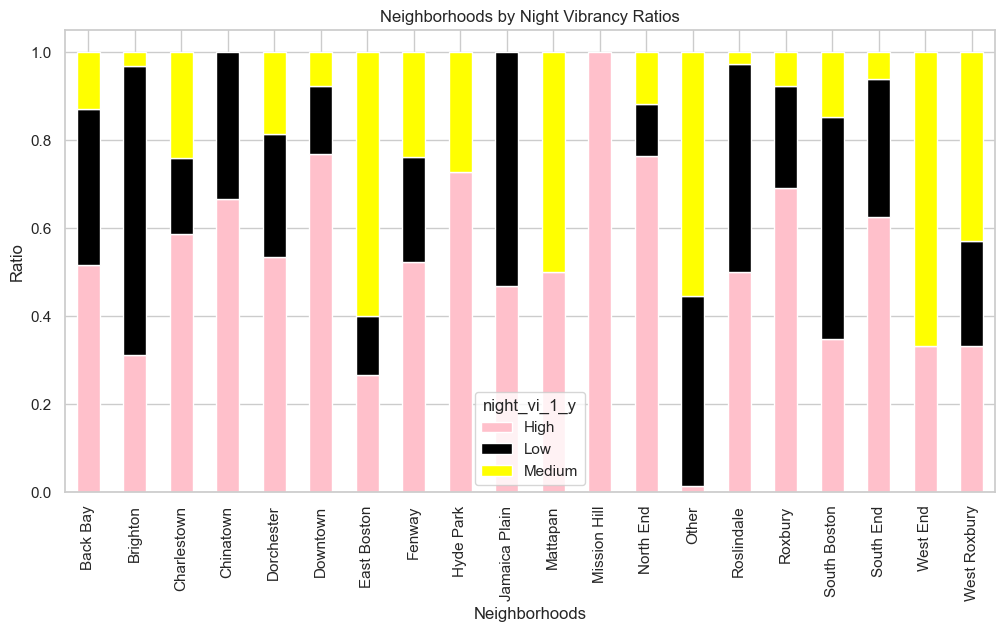

In [43]:
# Group neighborhoods by night vibrancy
neighborhoods_by_night_vibrancy = merged_gdf.groupby(['neighbourhoods_general', 'night_vi_1_y']).size().unstack(fill_value=0)
# Plot neighborhoods by night vibrancy
# Calculate ratios
neighborhoods_by_night_vibrancy_ratios = neighborhoods_by_night_vibrancy.div(neighborhoods_by_night_vibrancy.sum(axis=1), axis=0)

# Define colors
colors = {'Low': 'black', 'Medium': 'yellow', 'High': 'pink'}

# Plot neighborhoods by night vibrancy ratios
neighborhoods_by_night_vibrancy_ratios.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in neighborhoods_by_night_vibrancy_ratios.columns])
plt.title('Neighborhoods by Night Vibrancy Ratios')
plt.xlabel('Neighborhoods')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.show()

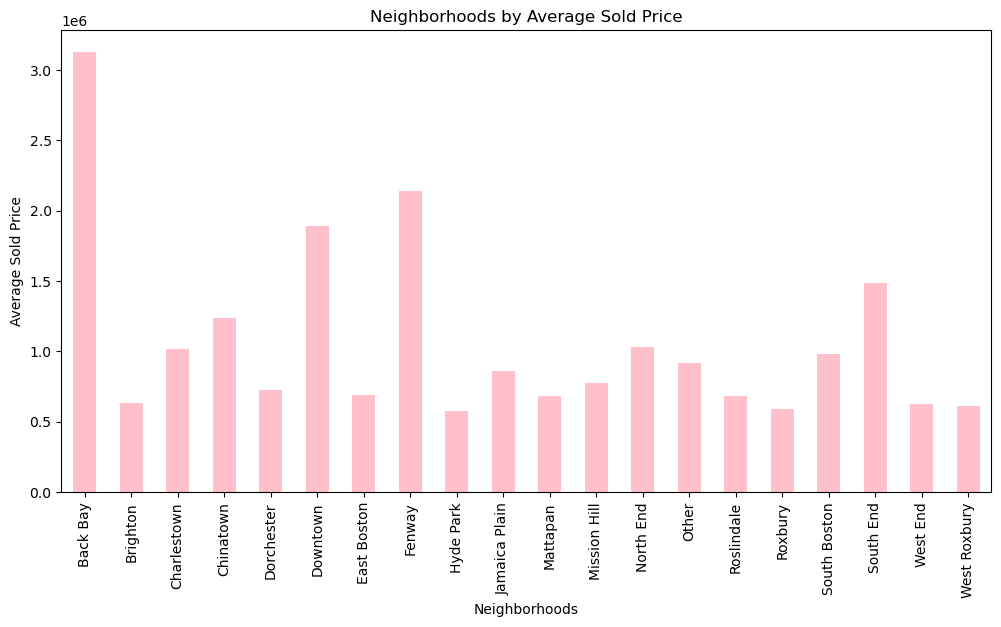

In [200]:
# Calculate average sold price by neighborhood
average_sold_price = merged_gdf.groupby('neighbourhoods_general')['sold_price'].mean()

# Plot neighborhoods by average sold price
average_sold_price.plot(kind='bar', figsize=(12, 6), color='pink')
plt.title('Neighborhoods by Average Sold Price')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Sold Price')
plt.xticks(rotation=90)
plt.show()

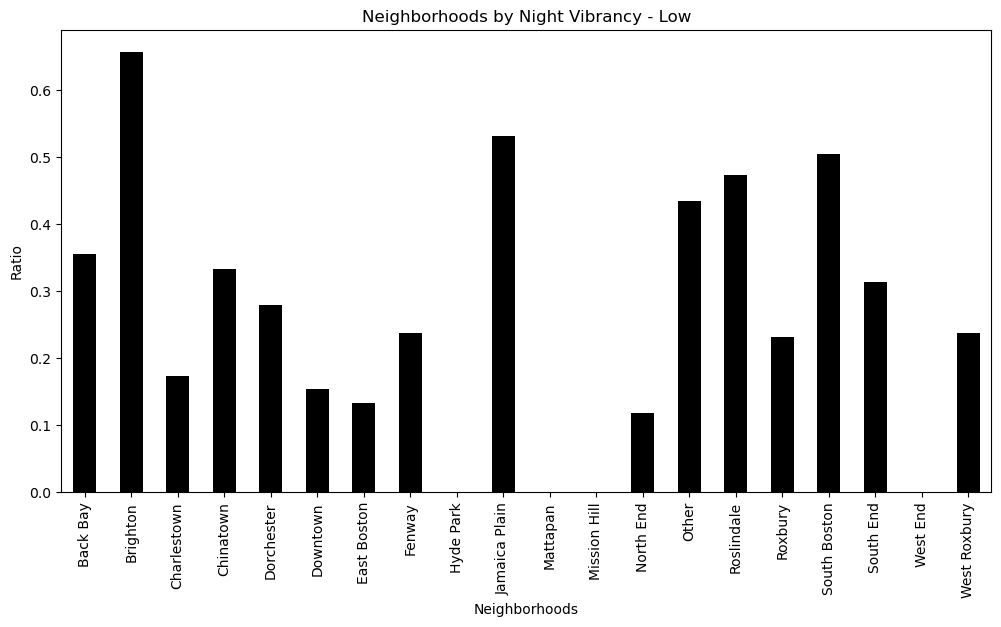

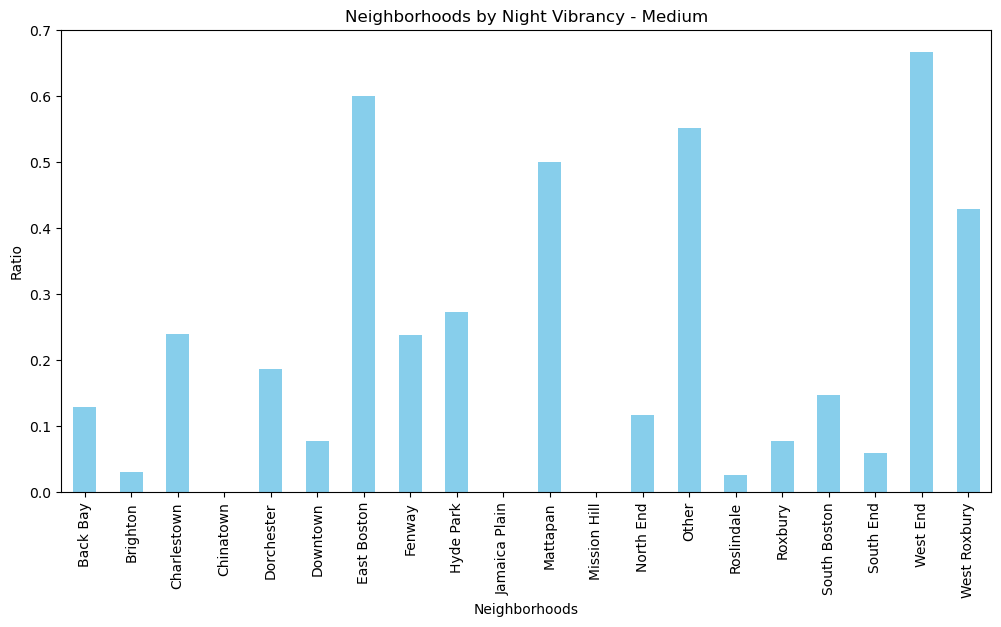

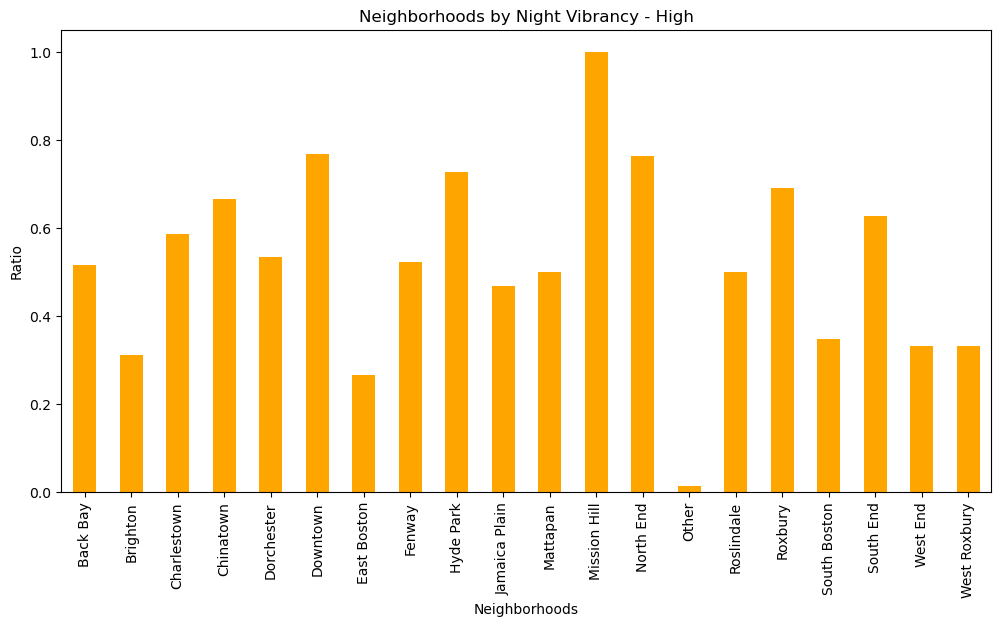

In [190]:
# Group neighborhoods by night vibrancy
neighborhoods_by_night_vibrancy = merged_gdf.groupby(['neighbourhoods_general', 'night_vi_1_y']).size().unstack(fill_value=0)
# Plot neighborhoods by night vibrancy
# Calculate ratios
neighborhoods_by_night_vibrancy_ratios = neighborhoods_by_night_vibrancy.div(neighborhoods_by_night_vibrancy.sum(axis=1), axis=0)
# Plot neighborhoods by night vibrancy ratios
night_vibrancies = ['Low', 'Medium', 'High']
colors = {'Low': 'black', 'Medium': 'skyblue', 'High': 'orange'}

for vibrancy in night_vibrancies:
    neighborhoods_by_night_vibrancy_ratios[vibrancy].plot(kind='bar', color=colors[vibrancy], figsize=(12, 6))
    plt.title(f'Neighborhoods by Night Vibrancy - {vibrancy}')
    plt.xlabel('Neighborhoods')
    plt.ylabel('Ratio')
    plt.xticks(rotation=90)
    plt.show()

In [45]:
list(merged_gdf)

['Join_Count',
 'TARGET_FID',
 'property_u',
 'mls',
 'mls_id',
 'status',
 'text',
 'style',
 'street',
 'unit',
 'city',
 'state',
 'zip_code',
 'beds',
 'full_baths',
 'half_baths',
 'sqft',
 'year_built',
 'days_on_ml',
 'list_price',
 'list_date',
 'sold_price',
 'last_sold_',
 'lot_sqft',
 'price_per_',
 'latitude',
 'longitude',
 'neighborho',
 'county',
 'fips_code',
 'stories',
 'hoa_fee',
 'parking_ga',
 'agent',
 'broker',
 'broker_pho',
 'nearby_sch',
 'primary_ph',
 'alt_photos',
 'Join_Cou_1',
 'TARGET_F_1',
 'JOIN_FID',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'GEO_ID',
 'GEOID_form',
 'GEOID_1',
 'Total',
 'PercInsure',
 'PercInsUnd',
 'PercIns6_1',
 'PercIns19_',
 'PercIns26_',
 'PercIns_65',
 'PercIns_Ma',
 'PercIns_Fe',
 'ObjectID_1',
 'placekey',
 'naics_code',
 'latitude_1',
 'longitude_',
 'brands',
 'date_range',
 'date_ran_1',
 'raw_visit_',
 'raw_visito',
 'visits

In [46]:
x = ['sqft', 'full_baths', 'beds', 'year_built','weekend__1'] #for each scenario replace weekend_1 with  'night_vi_1_y' or 'day_vibran'

In [47]:
yxs = merged_gdf.loc[:, ['sqft', 'full_baths', 'beds', 'year_built','weekend__1','sold_price','latitude', 'longitude']].dropna()

In [48]:
# Create yxs DataFrame
yxs 

,sqft,full_baths,beds,year_built,weekend__1,sold_price,latitude,longitude
0,1413.0,2.0,3.0,1905.0,19.000000,815000.0,42.333642,-71.039068
1,2721.0,2.0,4.0,1890.0,19.000000,1925000.0,42.333489,-71.037619
2,1772.0,2.0,3.0,1900.0,19.000000,1090000.0,42.333621,-71.040099
3,675.0,1.0,2.0,1890.0,19.000000,670000.0,42.334019,-71.038971
4,609.0,1.0,1.0,2001.0,19.000000,475000.0,42.335333,-71.041377
...,...,...,...,...,...,...,...,...
918,1237.0,2.0,2.0,1964.0,38.848485,925000.0,42.365505,-71.067431
919,908.0,1.0,1.0,1964.0,38.848485,544000.0,42.365616,-71.067390
920,1255.0,1.0,3.0,1920.0,81.275862,490000.0,42.326581,-71.086519
921,857.0,1.0,1.0,2009.0,59.920000,930000.0,42.350801,-71.065590


In [157]:
import numpy as np
y = np.log(
    yxs['sold_price'].astype(float) + 0.000001
)


In [118]:
print (boston_properties.loc[yxs.index,['longitude', 'latitude']].values)

[[-71.039068  42.333642]
 [-71.065786  42.380274]
 [-71.043374  42.334799]
 ...
 [-71.037572  42.379103]
 [-71.112689  42.270575]
 [-71.134113  42.274247]]


In [158]:
import libpysal
import spreg
# Create spatial weights
w = libpysal.weights.KNN.from_array(yxs[['longitude', 'latitude']].values)   

/Users/Zac/opt/anaconda3/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 101 disconnected components.
  warnings.warn(message)


In [159]:
w.transform = 'r'
w

Spatial Regression Models
We can use the spreg module in libpysal, which implements a standard OLS routine, but is particularly well suited for regressions on spatial data.

https://pysal.org/spreg/api.html

At this point, we are ready to fit the regression:

In [148]:
import libpysal
import spreg

In [160]:
m1 = spreg.OLS(y.values[:, None], yxs.drop('sold_price', axis=1).values, \
                  w=w, spat_diag=True, \
                  name_x=yxs.drop('sold_price', axis=1).columns.tolist(), name_y='ln(sold_price)')

In [161]:
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :ln(sold_price)                Number of Observations:         923
Mean dependent var  :     13.6164                Number of Variables   :           8
S.D. dependent var  :      0.5856                Degrees of Freedom    :         915
R-squared           :      0.3206
Adjusted R-squared  :      0.3154
Sum squared residual:      214.84                F-statistic           :     61.6902
Sigma-square        :       0.235                Prob(F-statistic)     :   1.238e-72
S.E. of regression  :       0.485                Log likelihood        :    -636.935
Sigma-square ML     :       0.233                Akaike info criterion :    1289.870
S.E of regression ML:      0.4825                Schwarz criterion     :    1328.491

----------------------------------------------------------

In [162]:
w_night_vibrancy = libpysal.weights.KNN.from_array(yxs.loc[\
                               yxs.index, \
                              ['longitude', 'latitude']\
                              ].values)

/Users/Zac/opt/anaconda3/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 101 disconnected components.
  warnings.warn(message)


In [163]:
yxs_w = yxs.assign(w_night_vibrancy=libpysal.weights.lag_spatial(w_night_vibrancy, yxs['weekend__1'].values))

In [164]:
m2 = spreg.OLS(y.values[:, None], \
                  yxs_w.drop('sold_price', axis=1).values, \
                  w=w, spat_diag=True, \
                  name_x=yxs_w.drop('sold_price', axis=1).columns.tolist(), name_y='ln(sold_price)')

In [165]:
print(m2.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :ln(sold_price)                Number of Observations:         923
Mean dependent var  :     13.6164                Number of Variables   :           9
S.D. dependent var  :      0.5856                Degrees of Freedom    :         914
R-squared           :      0.3210
Adjusted R-squared  :      0.3151
Sum squared residual:     214.719                F-statistic           :     54.0142
Sigma-square        :       0.235                Prob(F-statistic)     :    7.85e-72
S.E. of regression  :       0.485                Log likelihood        :    -636.676
Sigma-square ML     :       0.233                Akaike info criterion :    1291.352
S.E of regression ML:      0.4823                Schwarz criterion     :    1334.801

----------------------------------------------------------

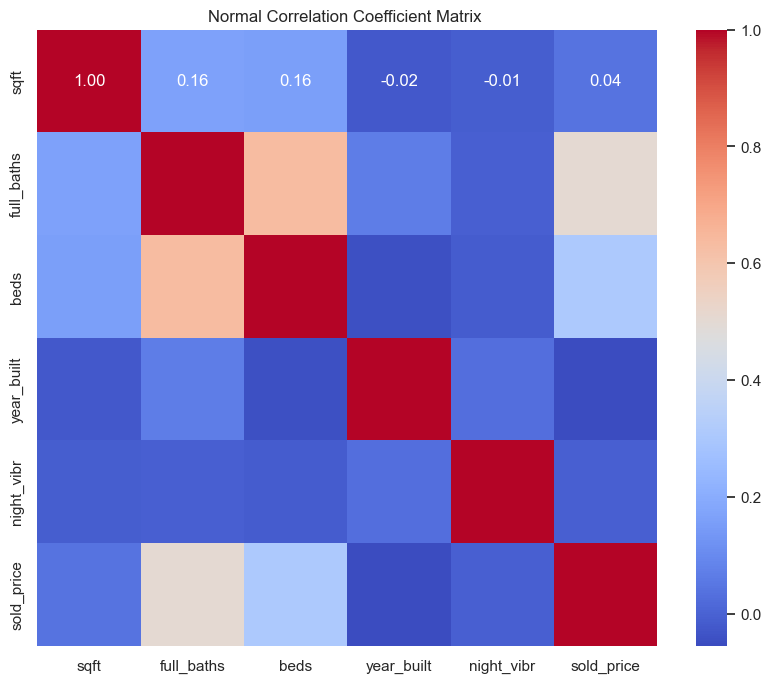

                sqft  full_baths      beds  year_built  night_vibr  sold_price
sqft        1.000000    0.163811  0.157213   -0.022364   -0.012572    0.043002
full_baths  0.163811    1.000000  0.635626    0.067566   -0.008804    0.503824
beds        0.157213    0.635626  1.000000   -0.045022   -0.013464    0.305831
year_built -0.022364    0.067566 -0.045022    1.000000    0.030945   -0.054523
night_vibr -0.012572   -0.008804 -0.013464    0.030945    1.000000   -0.006898
sold_price  0.043002    0.503824  0.305831   -0.054523   -0.006898    1.000000


In [140]:
x = ['sqft', 'full_baths', 'beds', 'year_built', 'night_vibr', 'sold_price']

yxs = boston_properties.loc[:, x].dropna()

# Convert sold_price to log scale
yxs['sold_price'] = np.log(yxs['sold_price'].astype(float) + 0.000001)

# Calculate correlation coefficient matrix
correlation_matrix1 = yxs.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix1, dtype=bool))

# Plot correlation coefficient matrix with values in each box
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Normal Correlation Coefficient Matrix ')
plt.show()
# Print correlation coefficient matrix
print(correlation_matrix1)

In [15]:
yxs_w = yxs_w.drop('night_vibrancy',axis = 1)

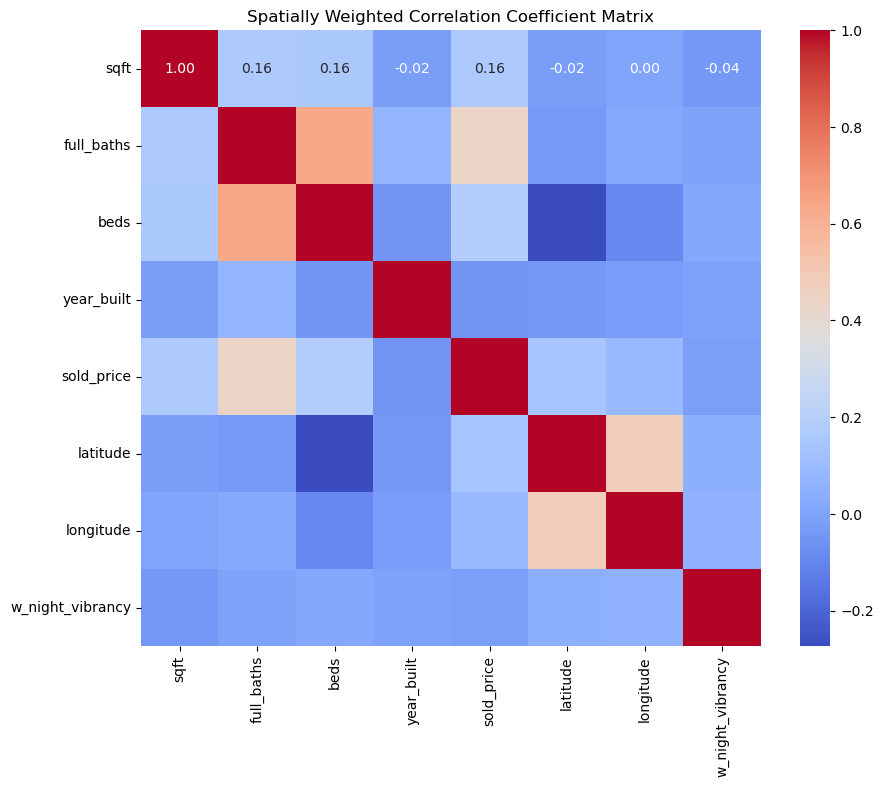

                      sqft  full_baths      beds  year_built  sold_price  \
sqft              1.000000    0.163811  0.157213   -0.022364    0.159981   
full_baths        0.163811    1.000000  0.635626    0.067566    0.439170   
beds              0.157213    0.635626  1.000000   -0.045022    0.179445   
year_built       -0.022364    0.067566 -0.045022    1.000000   -0.054071   
sold_price        0.159981    0.439170  0.179445   -0.054071    1.000000   
latitude         -0.021449   -0.036647 -0.273126   -0.040473    0.144007   
longitude         0.004361    0.025010 -0.091623   -0.025009    0.085394   
w_night_vibrancy -0.042200   -0.001318  0.015693   -0.008560   -0.015820   

                  latitude  longitude  w_night_vibrancy  
sqft             -0.021449   0.004361         -0.042200  
full_baths       -0.036647   0.025010         -0.001318  
beds             -0.273126  -0.091623          0.015693  
year_built       -0.040473  -0.025009         -0.008560  
sold_price        0.14400

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = yxs_w.corr()

# Plot correlation coefficient matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spatially Weighted Correlation Coefficient Matrix')
plt.show()
print(correlation_matrix)



In [148]:
print(df.columns)

NameError: name 'df' is not defined